# RQ1- Report Scripts

In [1]:
import pandas as pd
import pickle
from sklearn.manifold import TSNE
from google.colab import drive
from sklearn.cluster import DBSCAN
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import KernelPCA

drive.mount('/content/drive/')
PATH = '/content/drive/My Drive/Colab Notebooks/IR-WA_FinalProject/'

Mounted at /content/drive/


In [9]:
# Load Id: vec dictionary
id_vec = pickle.load(open(f"{PATH}data/utils/id_doc2vec.p","rb"))

X = list(id_vec.values())

# PCA

Since the data dimensionalty is to large we will reduced using **PCA**. This step is suggest in TSNE documentation to ensure a better representation.

In [11]:
PCA = KernelPCA(n_components = 50,n_jobs=-1)
X = PCA.fit_transform(X)

# TSNE

In [27]:
# Create model
tsne = TSNE(n_components=2, perplexity=20,n_jobs = -1)

#Embed vectors
vectors_embedded = tsne.fit_transform(X)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


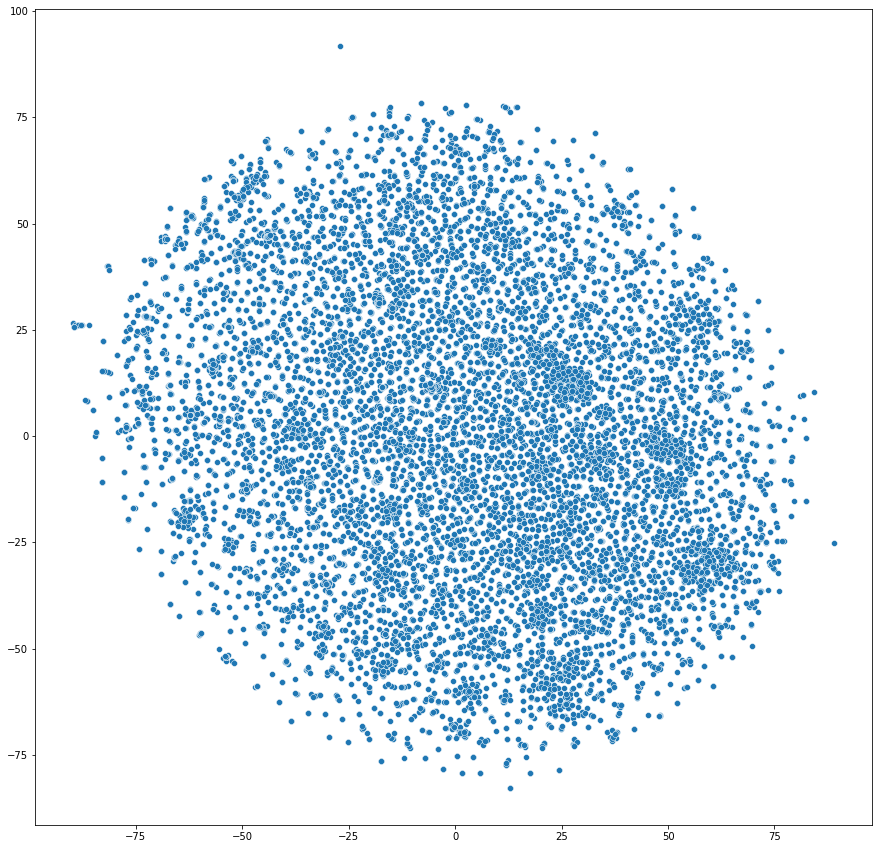

In [28]:
# Plot
fig, ax = plt.subplots(1,1,figsize=(15,15))

sns.scatterplot(vectors_embedded[:,0], vectors_embedded[:,1], legend='full', ax = ax)
plt.show()

# DBSCAN

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


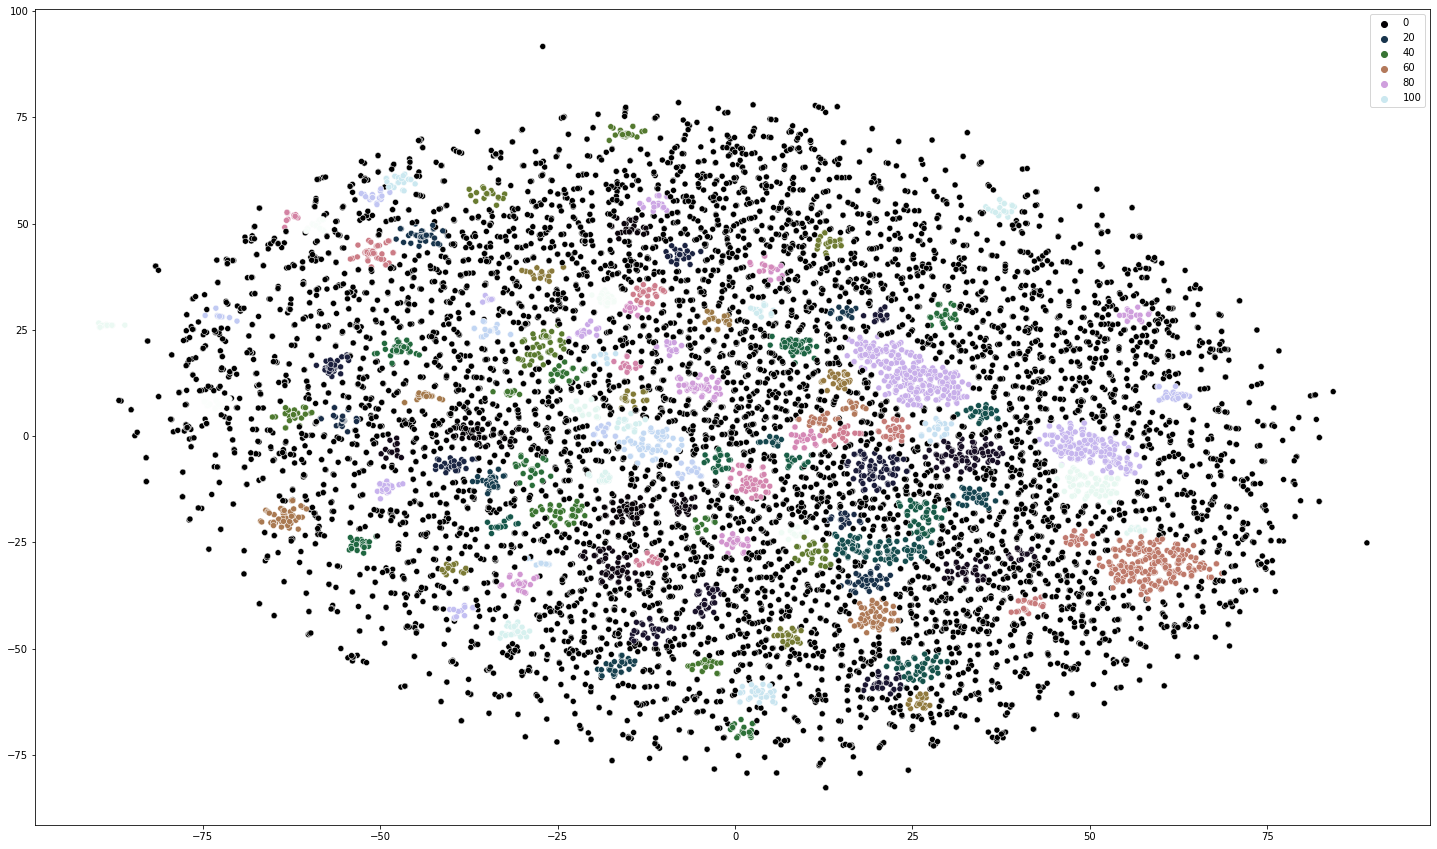

In [34]:
dbscan = DBSCAN(eps=2, min_samples=15, n_jobs = -1).fit(vectors_embedded)
labels = dbscan.labels_

# Plot
fig, ax = plt.subplots(1,1,figsize=(25,15))
palette = sns.color_palette("cubehelix", as_cmap=True)
sns.scatterplot(vectors_embedded[:,0], vectors_embedded[:,1], hue = labels, ax = ax,palette=palette)
plt.show()

In [15]:
ids = id_vec.keys()

df = pd.read_csv(f"{PATH}data/final_Tweets.csv")

In [16]:
user_name = []
for id in ids:
  row = df[df["id"] == id]
  user_name.append(str(row["user.name"].values))

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


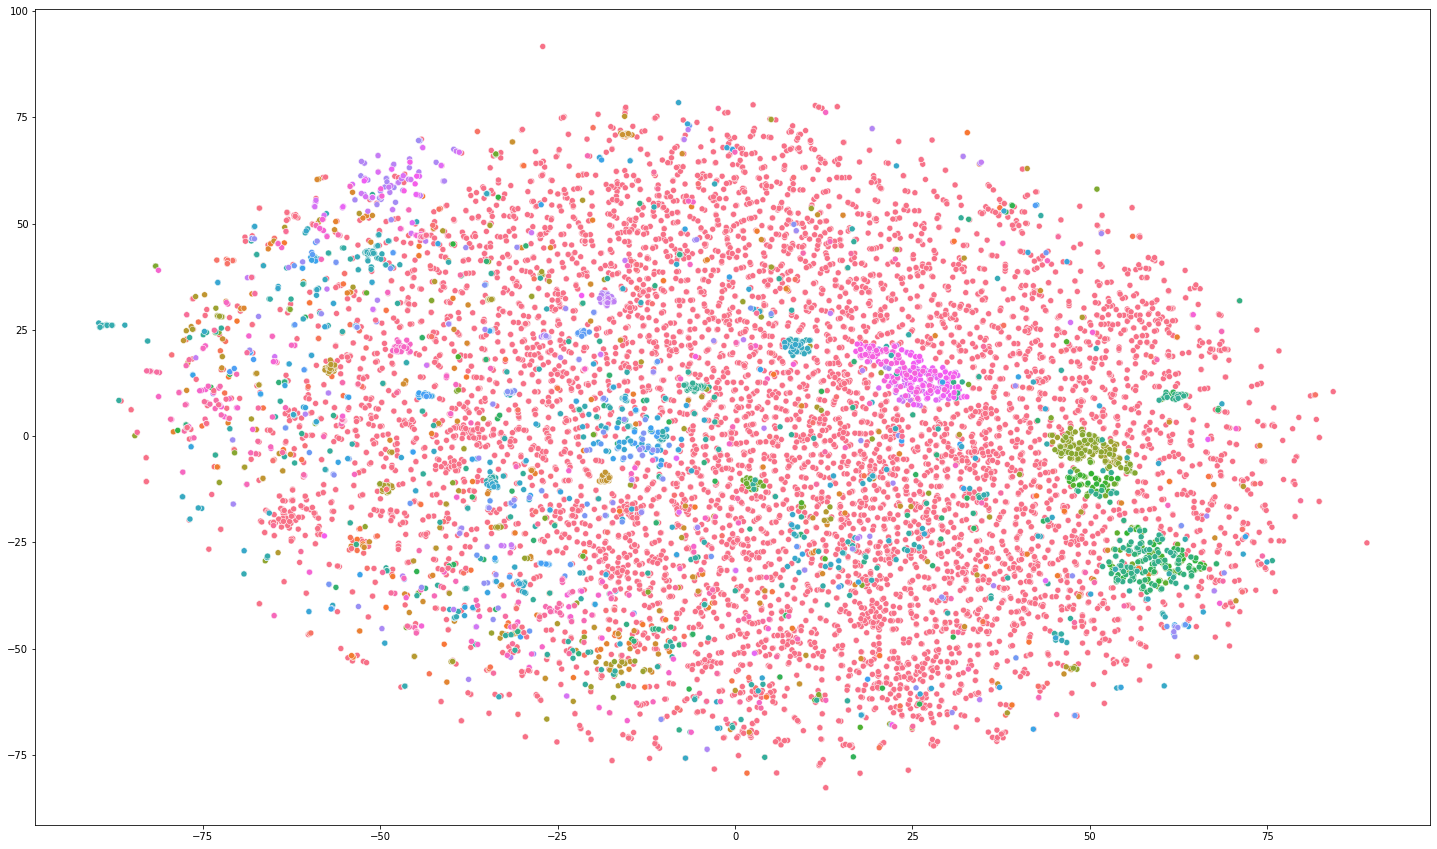

In [41]:
# Plot
fig, ax = plt.subplots(1,1,figsize=(25,15))


sns.scatterplot(vectors_embedded[:,0], vectors_embedded[:,1], hue = user_name, ax = ax)
plt.legend([],[], frameon=False)
plt.show()

In [38]:
id_cluster = {}

for index, id in enumerate(id_vec):
  id_cluster[id] = labels[index]

pickle.dump(id_cluster, open(f"{PATH}ResearchQuestions/id_cluster.p","wb"))